Econ Week 5

Structural Estimation

Kendra Robbins

In [40]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy import special as sp
import scipy.optimize as opt
import math

## Exercise 1

a)

In [159]:
clms = np.loadtxt('clms.txt')

In [126]:
mean = np.mean(clms)
median = np.median(clms)
max = np.max(clms)
min = np.min(clms)
sd = np.std(clms)

print ("mean:",str(mean),"\nmedian:",median,"\nmax:",max,"\nmin:",min,"\nstandard deviation:",sd)

mean: 720.2779753272437 
median: 172.21 
max: 227967.25 
min: 0.01 
standard deviation: 3972.663756393663


In [127]:
plt.hist?

(0, 22800)

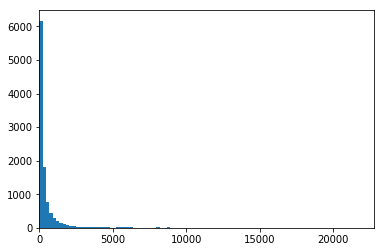

In [129]:
plt.hist(clms,bins=1000)
plt.xlim(0, 22800)

In [ ]:
num_bins = 10
weights = (1 / pennies_all.shape[0]) * np.ones_like(pennies_all)
n, bin_cuts, patches = plt.hist(pennies_all, num_bins, weights=weights, edgecolor='k')
plt.title('Histogram of penny thickness (mils): 1945-1989', fontsize=17)
plt.xlabel(r'Thickness (mils)')
plt.ylabel(r'Percent of observations in bin')

num_bins =1000
weights = (1/np.shape(clms))

In [130]:
np.shape(clms)

(10619,)

[]

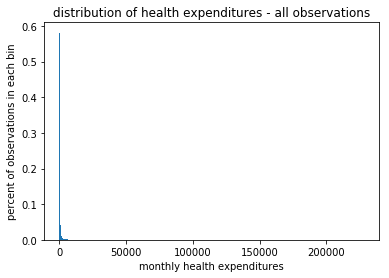

In [139]:
num_bins =1000
weights = (1/10619)*np.ones_like(clms)
n,bincuts,patches = plt.hist(clms,num_bins,weights=weights)
plt.xlabel("monthly health expenditures")
plt.ylabel("percent of observations in each bin")
plt.title("distribution of health expenditures - all observations")
plt.plot()

[]

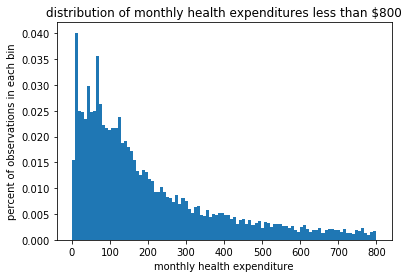

In [173]:
weights = (1/10619)*np.ones_like(clms)

n2,bincuts2,patches2 = plt.hist(clms,bins=100, range=(0,800),weights=weights)
plt.xlabel("monthly health expenditure")
plt.ylabel("percent of observations in each bin")
plt.title("distribution of monthly health expenditures less than $800")
plt.plot()

One may prefer the second histogram because it shows variation in the majority of the observations wheras the first histogram only shows that most observations are near 0 and there is a high outlier. 

b.)

In [201]:
#ga_pdf returns the value of a GA pdf with specified α,β values at a specified x
def pdf_ga(xvals,α,β):
    pdf = 1/((β**α)*sp.gamma(α)) * xvals**(α-1)*np.exp(-(xvals/β))
    return pdf

#loglike_ga returns the log likelihood of a GA distribution with parameters α,β, evaluated at x
def loglike_ga(xvals, α, β):
    pdf = pdf_ga(xvals, α, β)
    ln_pdf = np.log(pdf)
    loglike = ln_pdf.sum()
    return loglike

In [202]:
#crit_ga returns the negative log likelihood of of GA distribution
def crit_ga(params, *args):
    
    α,β=params
    xvals=args
    loglike=loglike_ga(xvals,α,β)
    neg_loglike = -loglike 
    return neg_loglike

In [203]:
β_init = sd**2 / mean
α_init = mean/β_init
params_init = np.array([α_init,β_init])
result = opt.minimize(crit_ga,params_init,args=clms,method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)))
α_MLE, β_MLE = result.x
loglikval = -result.fun
print("α_MLE:", α_MLE, "\nβ_MLE:",β_MLE, "\nlog likelihood value:",loglikval)

α_MLE: 0.22175532272679777 
β_MLE: 21911.064699249375 
log likelihood value: -82076.45160566256


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


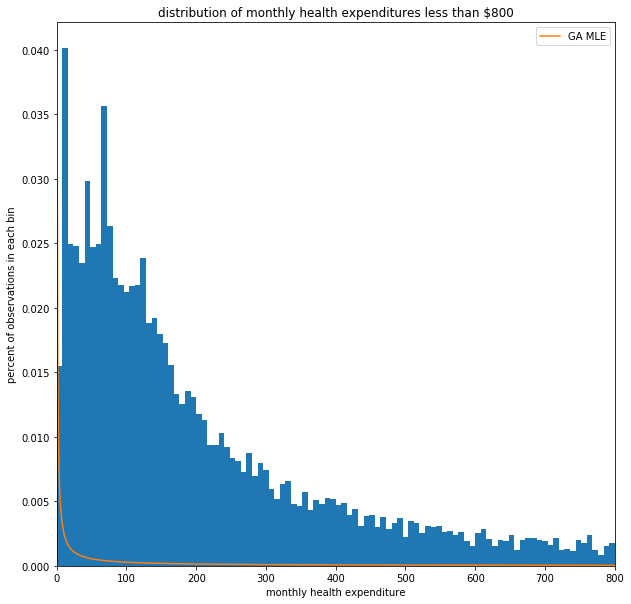

In [218]:
weights = (1/10619)*np.ones_like(clms)
plt.figure(figsize=(10, 10))
D=np.linspace(0,800,1000)
n2,bincuts2,patches2 = plt.hist(clms,bins=100, range=(0,800),weights=weights)
plt.xlabel("monthly health expenditure")
plt.ylabel("percent of observations in each bin")
plt.title("distribution of monthly health expenditures less than $800")
plt.xlim(0,800)
plt.plot(D, pdf_ga(D,α_MLE,β_MLE), label="GA MLE")
plt.legend()
plt.show()

c.)
# {{{{my alpha_MLE is a little different than Tims}}}

In [211]:
#gg_pdf returns the value of a GG pdf with parameters α,β,m evaluated at xvals
def pdf_gg(xvals,α,β,m):
    pdf = m/((β**α)*sp.gamma(α/m)) * xvals**(α-1)*np.exp((-(xvals/β))**m)
    return pdf

#loglike_gg returns the log likelihood of a GG distribution with parameters α,β,m evaluated at xvals
def loglike_gg(xvals, α, β, m):
    pdf = pdf_gg(xvals, α, β, m)
    ln_pdf = np.log(pdf)
    loglike = ln_pdf.sum()
    return loglike

In [212]:
#crit_gg returns the negative log likelihood of of GG distribution
def crit_gg(params, *args):
    α,β,m=params
    xvals=args
    loglike=loglike_gg(xvals,α,β,m)
    neg_loglike = -loglike 
    return neg_loglike

In [217]:
β_init = sd**2 / mean
α_init = mean/β_init
m_init=1
params_init_gg = np.array([α_init,β_init,m_init])
result_gg = opt.minimize(crit_gg,params_init_gg,args=clms,method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None),(1e-5, None)))
α_MLE, β_MLE, m_MLE = result_gg.x

loglikval = loglike_gg(clms,α_MLE,β_MLE,m_MLE)

#loglikval = -result_gg.fun
print("α_MLE:", α_MLE, "\nβ_MLE:",β_MLE, "\nm_MLE:",m_MLE, "\nlog likelihood value:",loglikval)

α_MLE: 0.032872796694206986 
β_MLE: 21911.064702753894 
m_MLE: 1.0 
log likelihood value: -93555.39390345218


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


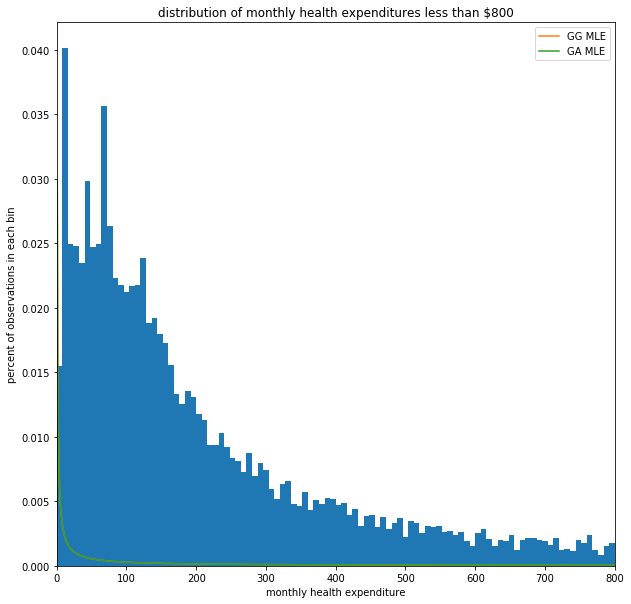

In [221]:
weights = (1/10619)*np.ones_like(clms)
plt.figure(figsize=(10, 10))
D=np.linspace(0,800,1000)
n2,bincuts2,patches2 = plt.hist(clms,bins=100, range=(0,800),weights=weights)
plt.xlabel("monthly health expenditure")
plt.ylabel("percent of observations in each bin")
plt.title("distribution of monthly health expenditures less than $800")
plt.xlim(0,800)
plt.plot(D, pdf_gg(D,α_MLE,β_MLE,m_MLE), label="GG MLE")
plt.plot(D, pdf_ga(D,α_MLE,β_MLE), label="GA MLE")
plt.legend()
plt.show()

d.)

# doesn't work

In [223]:
#pdf_gb2 returns the value of a GB2 pdf with parameters a,b,p,q evaluated at xvals
def pdf_gb2(xvals,a,b,p,q):  
    pdf = a*xvals**(a*p-1) / (b**(a*p)*sp.beta(p,q)*(1+(xvals/b)**a)**(p+q))    
    return pdf

#loglike_gb2 returns the log likelihood of a GB2 distribution with parameters a,b,p,q evaluated at xvals
def loglike_gb2(xvals,a,b,p,q):
    pdf = pdf_gb2(xvals, a,b,p,q)
    ln_pdf = np.log(pdf)
    loglike = ln_pdf.sum()
    return loglike

#crit_gb2 returns the negative log likelihood of GB2 distribution
def crit_gb2(params, *args):
    a,b,p,q=params
    xvals=args
    loglike=loglike_gb2(xvals,a,b,p,q)
    neg_loglike = -loglike 
    return neg_loglike

In [226]:
a_init = sd**2 / mean
b_init = mean/b_init
p_init=1
q_init=200
params_init_gb2 = np.array([a_init,b_init,p_init,q_init])
result_gb2 = opt.minimize(crit_gb2,params_init_gb2,args=clms,method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None),(1e-5, None),(1e-5, None)))
a_MLE, b_MLE, p_MLE, q_MLE = result_gb2.x

#loglikval = loglike_gb2(clms,a_MLE,b_MLE,p_MLE,q_MLE)

loglikval = -result_gg.fun
print("a_MLE:", a_MLE, "\nb_MLE:",b_MLE, "\np_MLE:",p_MLE, "\nq_MLE:",q_MLE, "\nlog likelihood value:",loglikval)

a_MLE: 21911.064702753894 
b_MLE: 21911.064702753898 
p_MLE: 1.0 
q_MLE: 200.0 
log likelihood value: nan


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


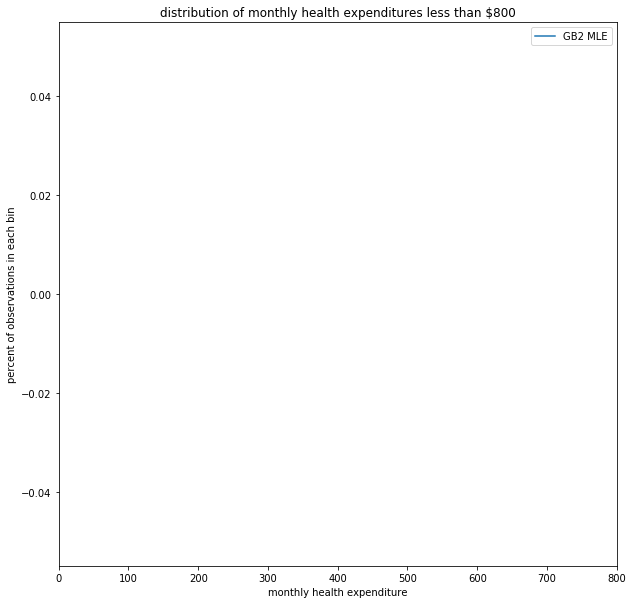

In [228]:
weights = (1/10619)*np.ones_like(clms)
plt.figure(figsize=(10, 10))
D=np.linspace(0,800,1000)
#n2,bincuts2,patches2 = plt.hist(clms,bins=100, range=(0,800),weights=weights)
plt.xlabel("monthly health expenditure")
plt.ylabel("percent of observations in each bin")
plt.title("distribution of monthly health expenditures less than $800")
plt.xlim(0,800)
#plt.plot(D, pdf_gg(D,α_MLE,β_MLE,m_MLE), label="GG MLE")
#plt.plot(D, pdf_ga(D,α_MLE,β_MLE), label="GA MLE")
plt.plot(D,pdf_gb2(D,a_MLE,b_MLE,p_MLE,q_MLE),label="GB2 MLE")
plt.legend()
plt.show()

## Problem 2

# a.) MLE results are sensitive to initial conditions
# what does .fun do

In [8]:
macro = pd.read_csv('MacroSeries.txt', names=['c','k','w','r','y'])

In [22]:
#get_z uses equation 3 to compute z given k,w,α
def get_z(k,w,α):
    z = np.log(w/((1-α)*k**α))
    return z
   
#loglike_z returns the log likehood of z values 
def loglike_z(k,w,α,μ,ρ,σ):
    z=get_z(k,w,α)
    z_pdf_vals = np.empty_like(z)
    
    for i in range(len(z)):
        if i == 0: 
            z_pdf_vals[i]=norm.pdf(μ,loc=μ,scale=σ**2)
        else:
            z_pdf_vals[i]=norm.pdf(z[i],loc=ρ*z[i-1]+(1-ρ)*μ,scale=σ**2)
    
    ln_z_pdf_vals = np.log(z_pdf_vals)
    loglike=ln_z_pdf_vals.sum()
    return loglike
   
#crit is the function that we will minimize  
def crit(params, *args):
    α,μ,ρ,σ=params
    k,w=args
    loglike = loglike_z(k,w,α,μ,ρ,σ)
    return -loglike 
    

In [70]:
α_init=.6
μ_init=.6
ρ_init=.5
σ_init=.4
params_init_z=[α_init,μ_init,ρ_init,σ_init]
args_z = (macro['k'],macro['w'])
result = opt.minimize(crit, params_init_z, args_z, method ='L-BFGS-B', bounds=((1e-4, 0.9999),(1e-4, None),(-0.99, 0.99),(1e-2, None)))
α_MLE, μ_MLE, ρ_MLE, σ_MLE = result.x
loglike= -result.fun

vcv_mle = result.hess_inv.todense()

# Change the sign of the off-diagonal elements
vcv_mle = np.eye(4) * vcv_mle + (np.eye(4) - 1) * vcv_mle

print("α MLE:",α_MLE,"\nμ MLE:", μ_MLE,"\nρ MLE:", ρ_MLE,"\nσ MLE:", σ_MLE,"\nlog likelihood:",loglike)

print('VCV(MLE) = \n', vcv_mle)

α MLE: 0.5533996608761833 
μ MLE: 8.106608080983477 
ρ MLE: 0.8246529760600727 
σ MLE: 0.30459854866895336 
log likelihood: 95.85827569185969
VCV(MLE) = 
 [[ 3.59998443e-01  4.76663940e+00  2.35102218e-02 -1.19449672e-03]
 [ 4.76663940e+00  6.31243530e+01 -3.17784034e-01  1.53465821e-02]
 [ 2.35102218e-02 -3.17784034e-01  1.74902838e-02 -3.22740960e-04]
 [-1.19449672e-03  1.53465821e-02 -3.22740960e-04  1.48545134e-04]]


b.)

In [51]:
#get z as a function of k and r using equation 4
def get_z2(k,r,α):
    z = np.log(r/(α*k**(α-1)))
    return z 

#get the log likelihood of z values
def loglike_z2(k,r,α,μ,ρ,σ):
    z=get_z(k,r,α)
    z_pdf_vals = np.empty_like(z)
    
    for i in range(len(z)):
        if i == 0: 
            z_pdf_vals[i]=norm.pdf(μ,loc=μ,scale=σ**2)
        else:
            z_pdf_vals[i]=norm.pdf(z[i],loc=ρ*z[i-1]+(1-ρ)*μ,scale=σ**2)
    
    ln_z_pdf_vals = np.log(z_pdf_vals)
    loglike=ln_z_pdf_vals.sum()
    return loglike

#crit is the function that we will minimize  
def crit2(params, *args):
    α,μ,ρ,σ=params
    k,w=args
    loglike = loglike_z2(k,w,α,μ,ρ,σ)
    return -loglike 
    

In [90]:
α_init2=.6
μ_init2=.6
ρ_init2=.5
σ_init2=.4
params_init_z2=[α_init,μ_init,ρ_init,σ_init]
args_z2 = (macro['k'],macro['r'])
result2 = opt.minimize(crit2, params_init_z2, args_z2, method ='L-BFGS-B', bounds=((1e-4, 0.9999),(1e-4, None),(-0.99, 0.99),(1e-2, None)))
α_MLE2, μ_MLE2, ρ_MLE2, σ_MLE2 = result2.x
loglike2= -result2.fun

vcv_mle2 = result2.hess_inv.todense()

# Change the sign of the off-diagonal elements
vcv_mle2 = np.eye(4) * vcv_mle2 + (np.eye(4) - 1) * vcv_mle2

print("α MLE:",α_MLE2,"\nμ MLE:", μ_MLE2,"\nρ MLE:", ρ_MLE2,"\nσ MLE:", σ_MLE2,"\nlog likelihood:",loglike2)

print('VCV(MLE) = \n', vcv_mle)

α MLE: 9.999999999998899e-05 
μ MLE: 0.5453895239012052 
ρ MLE: 0.99 
σ MLE: 0.37183152367567485 
log likelihood: 72.65771953261803
VCV(MLE) = 
 [[ 3.59998443e-01  4.76663940e+00  2.35102218e-02 -1.19449672e-03]
 [ 4.76663940e+00  6.31243530e+01 -3.17784034e-01  1.53465821e-02]
 [ 2.35102218e-02 -3.17784034e-01  1.74902838e-02 -3.22740960e-04]
 [-1.19449672e-03  1.53465821e-02 -3.22740960e-04  1.48545134e-04]]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


c.)

In [94]:
zt_1 = 10 #z_t-1
kt=7500000

#use equation 4 to solve for z_start such that r=1 and k=7500000
z_star = get_z2(kt,1,α_MLE)

prob = 1 - norm.cdf(z_star, loc=ρ_MLE*zt_1 + (1-ρ_MLE)*μ_MLE, scale=σ_MLE**2)

prob

1.0

## Exercise 3

In [110]:
inc = pd.read_table('usincmoms.txt',header=None,names=['p','m'])
#'p' is the percent of households in that bracket
#'m' is the midpoint of that income bracket 

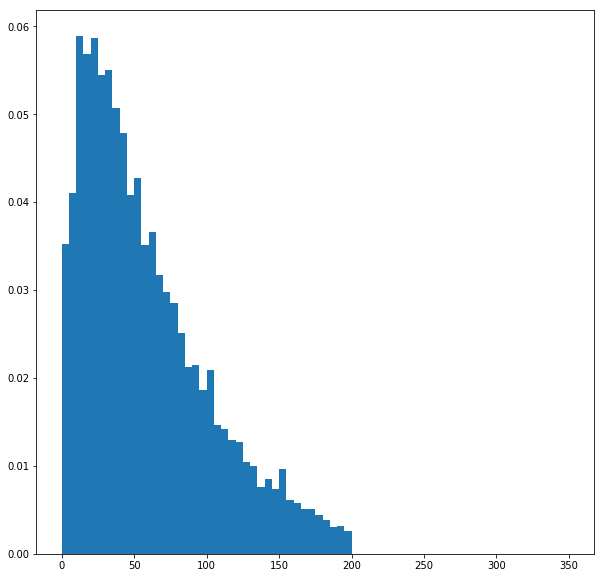

In [131]:
m_in_dollars = inc['m']/1000
wts = inc['p']
#wts[41]=wts[41]/20
#wts[40] =wts[40]/10
bins = np.append(np.linspace(0,200,41),[250,350])
plt.figure(figsize=(10, 10))
a,b,c=plt.hist(m_in_dollars, weights=wts, bins=bins)

plt.show()

In [133]:
print(wts[40],wts[41])

1.8970144999999997e-08 3.6234876562499996e-10


In [134]:
wts

0     3.519016e-02
1     4.106206e-02
2     5.885948e-02
3     5.683611e-02
4     5.859520e-02
5     5.443284e-02
6     5.506050e-02
7     5.067515e-02
8     4.785894e-02
9     4.083908e-02
10    4.269728e-02
11    3.509931e-02
12    3.660239e-02
13    3.168022e-02
14    2.978073e-02
15    2.850890e-02
16    2.507330e-02
17    2.119173e-02
18    2.142297e-02
19    1.859025e-02
20    2.086964e-02
21    1.462609e-02
22    1.422967e-02
23    1.295784e-02
24    1.271834e-02
25    1.038940e-02
26    1.000124e-02
27    7.581451e-03
28    8.514680e-03
29    7.374985e-03
30    9.629599e-03
31    6.111409e-03
32    5.756287e-03
33    5.037783e-03
34    5.095594e-03
35    4.377090e-03
36    3.798984e-03
37    2.997894e-03
38    3.138291e-03
39    2.576702e-03
40    1.897014e-08
41    3.623488e-10
Name: p, dtype: float64

In [135]:
inc

,p,m
0,3.519016e-02,2500
1,4.106206e-02,7500
2,5.885948e-02,12500
3,5.683611e-02,17500
4,5.859520e-02,22500
5,5.443284e-02,27500
6,5.506050e-02,32500
7,5.067515e-02,37500
8,4.785894e-02,42500
9,4.083908e-02,47500
